# Palmer Penguins Dataset Analysis
## CS14003 - Project 2: Decision Tree

**Dataset**: Palmer Penguins Dataset  
**Task**: Multi-class classification (Species: Adelie, Chinstrap, Gentoo)  
**Samples**: 344  
**Features**: Physical characteristics (bill, flipper, body mass, etc.)

---

### **THƯ VIỆN**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")


### **1) ĐỌC & XỬ LÝ DỮ LIỆU**

In [ ]:
penguins = pd.read_csv("../data/penguins.csv")
penguins.dropna(inplace=True)

# Tách đặc trưng và nhãn
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = penguins['species']

X = pd.get_dummies(X, columns=['sex'])


### **2) CHIA TẬP DỮ LIỆU THEO TỶ LỆ**

In [16]:
# Hàm chia tập theo các tỷ lệ test
def get_stratified_splits(X, y, test_sizes):
    splits = {}
    for ratio in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=ratio, stratify=y, random_state=42)
        name = f"{int((1-ratio)*100)}/{int(ratio*100)}"
        splits[name] = (X_train, X_test, y_train, y_test)
    return splits

splits = get_stratified_splits(X, y, test_sizes=[0.6, 0.4, 0.2, 0.1])


### **3) PHÂN BỐ NHÃN TRƯỚC & SAU KHI CHIA**

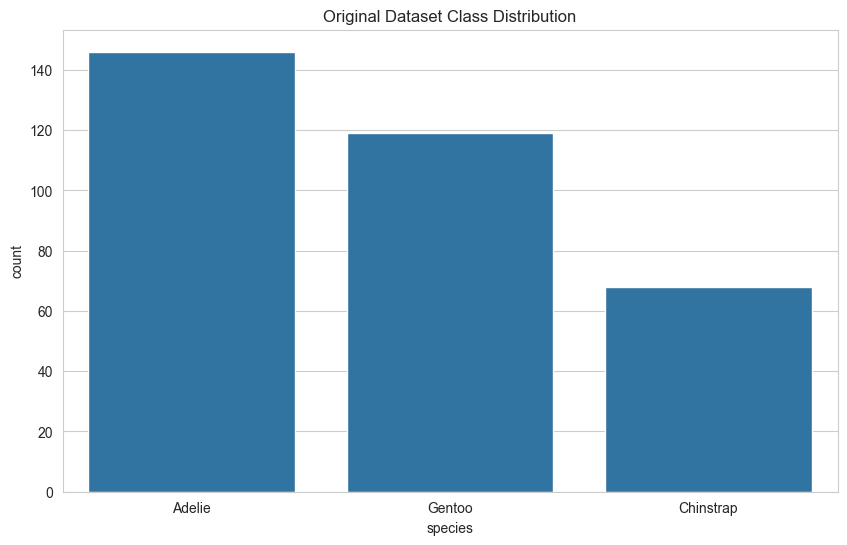

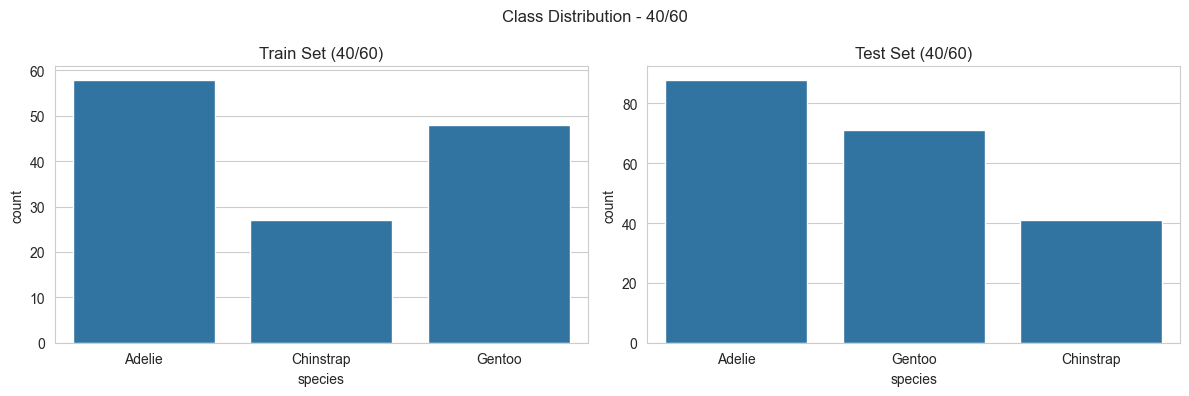

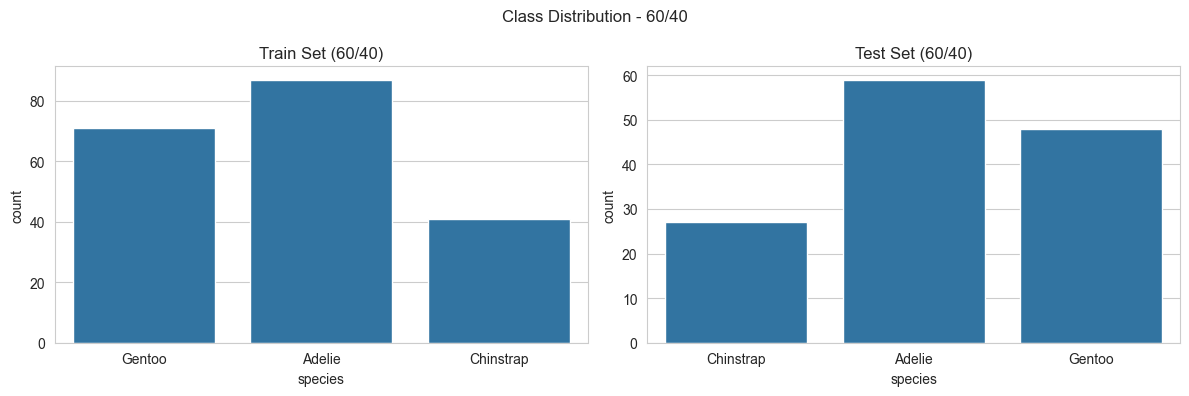

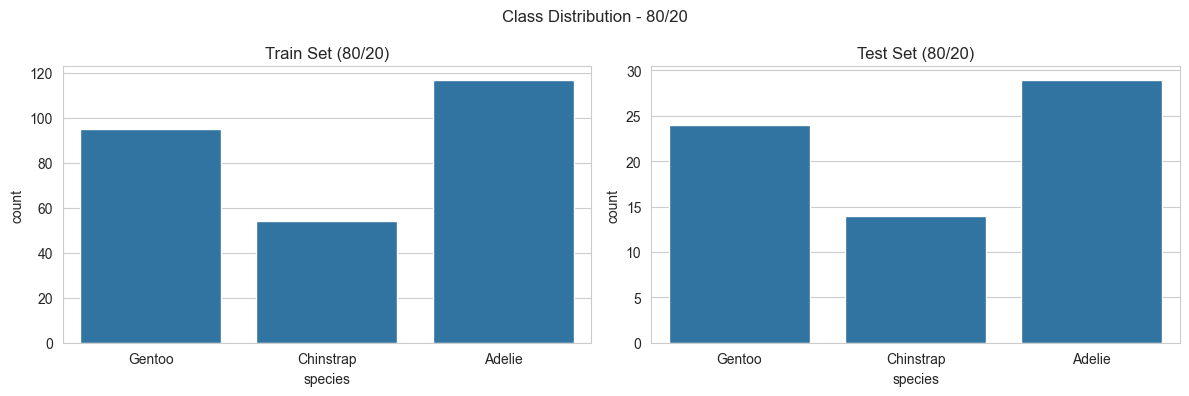

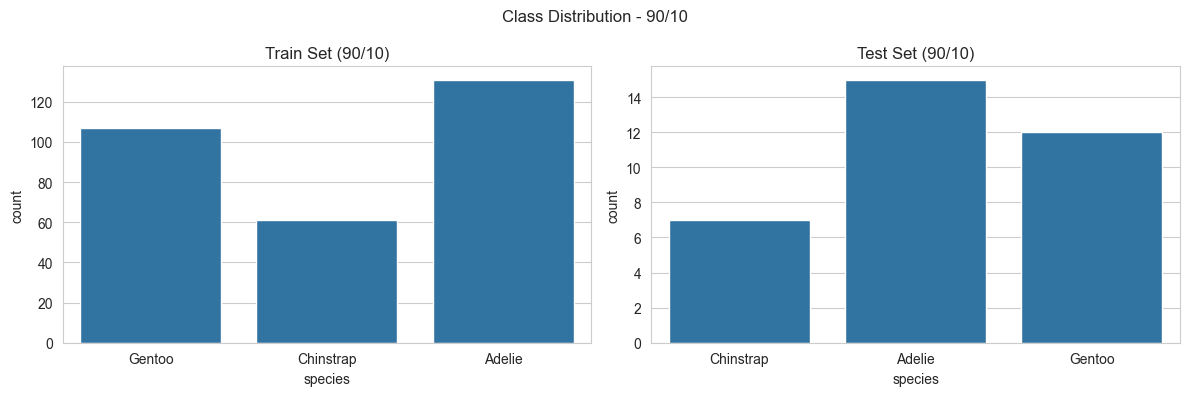

In [17]:
# Phân bố ban đầu
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title("Original Dataset Class Distribution")
plt.show()

# Phân bố train/test từng tỷ lệ
for name, (X_train, X_test, y_train, y_test) in splits.items():
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.countplot(x=y_train, ax=ax[0])
    ax[0].set_title(f"Train Set ({name})")
    sns.countplot(x=y_test, ax=ax[1])
    ax[1].set_title(f"Test Set ({name})")
    plt.suptitle(f"Class Distribution - {name}")
    plt.tight_layout()
    plt.show()


### **4) HUẤN LUYỆN MÔ HÌNH VÀ VẼ CÂY QUYẾT ĐỊNH**

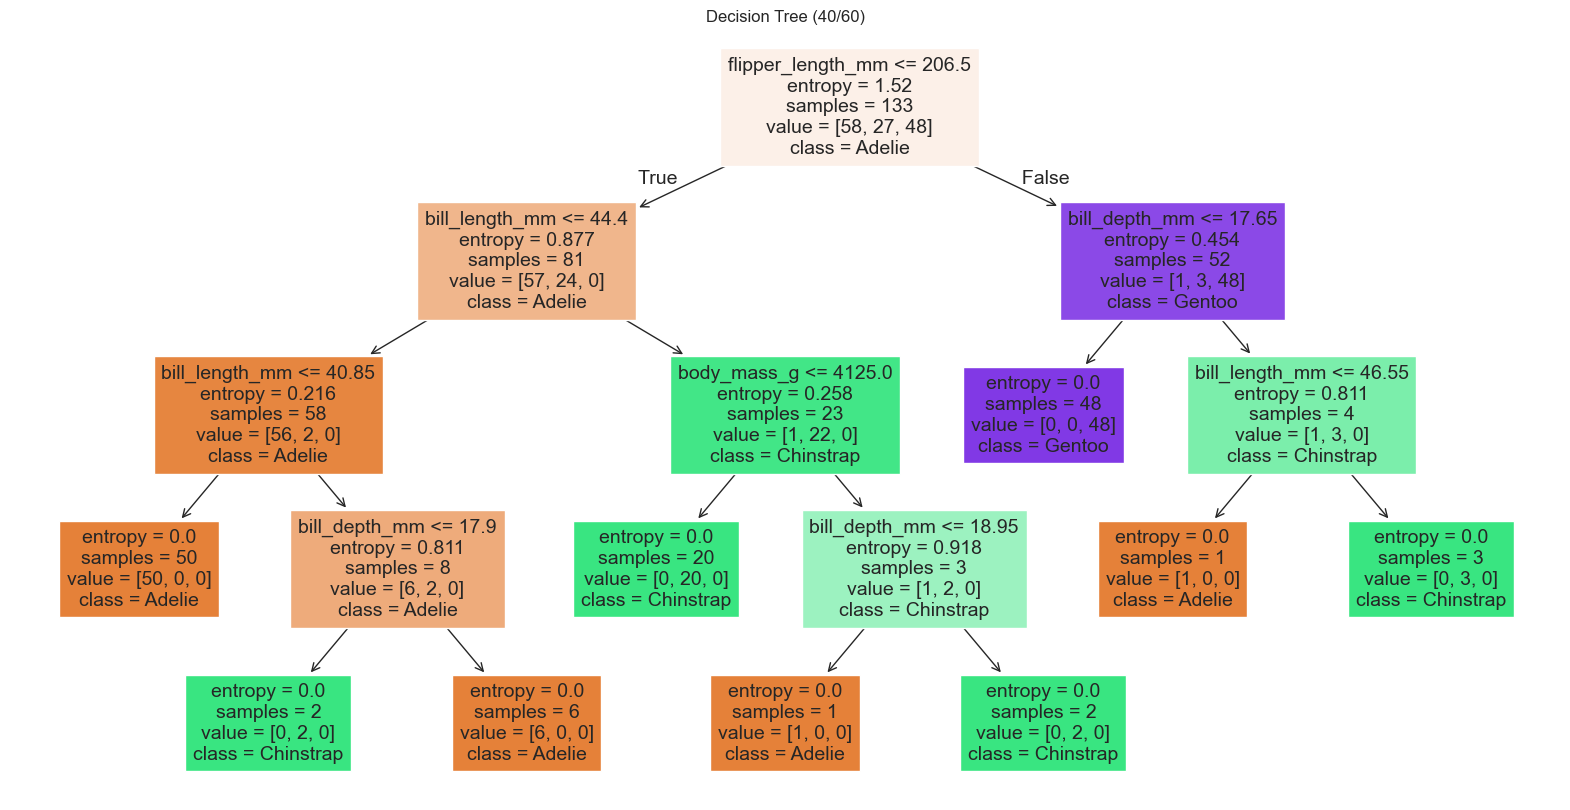

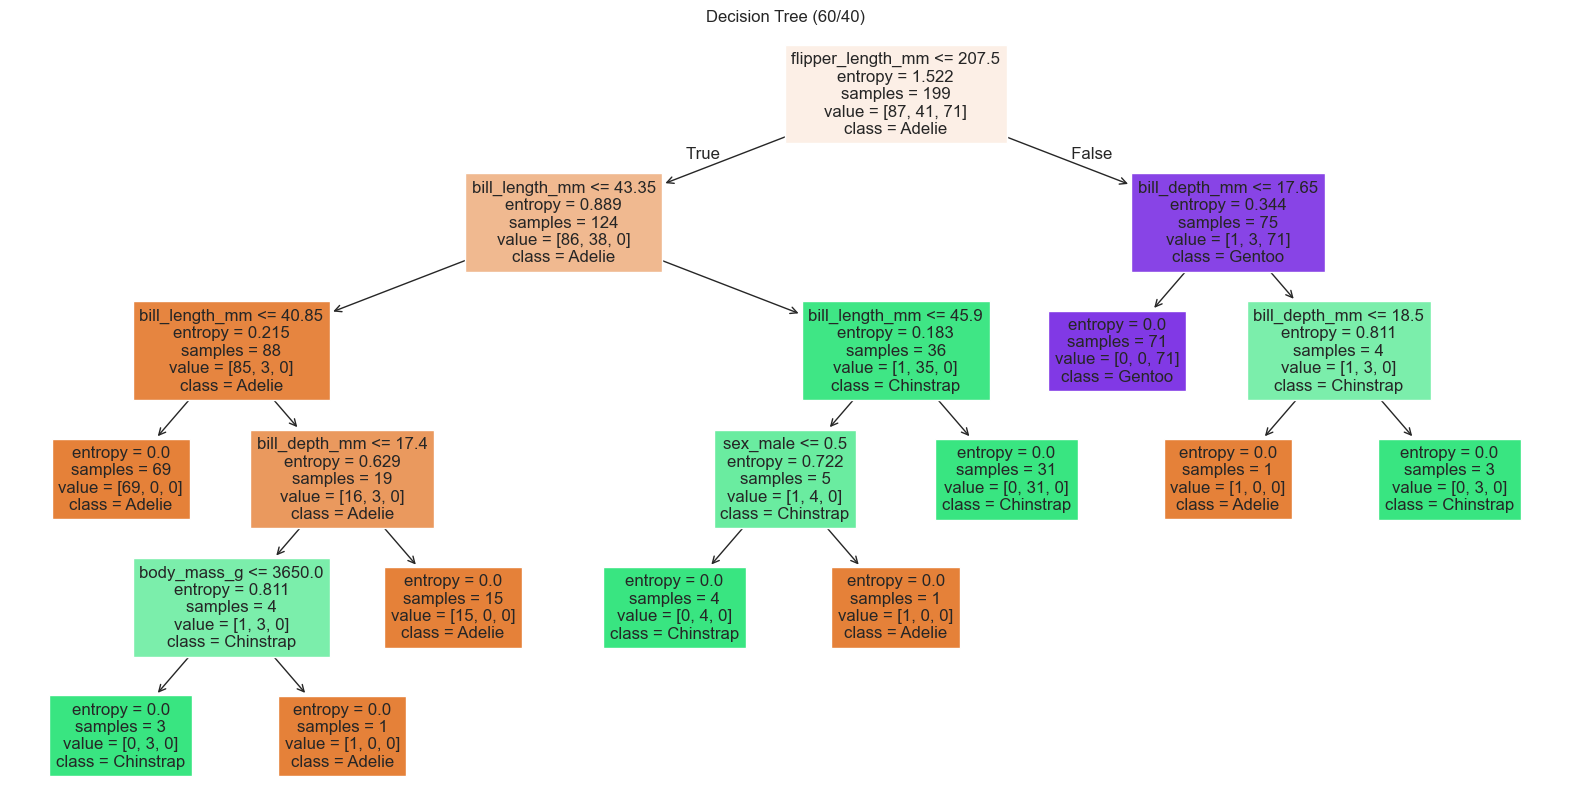

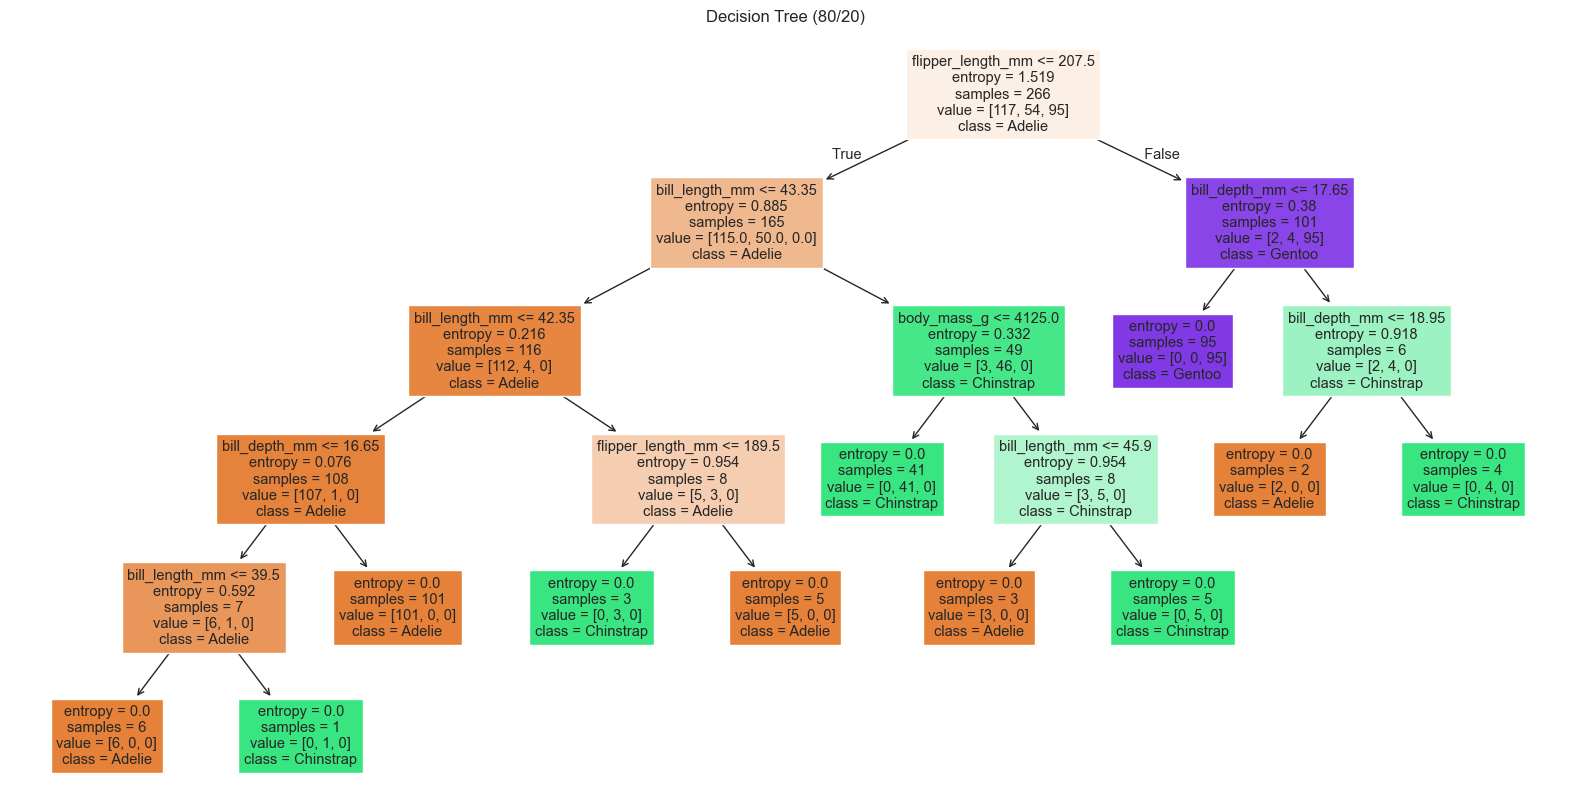

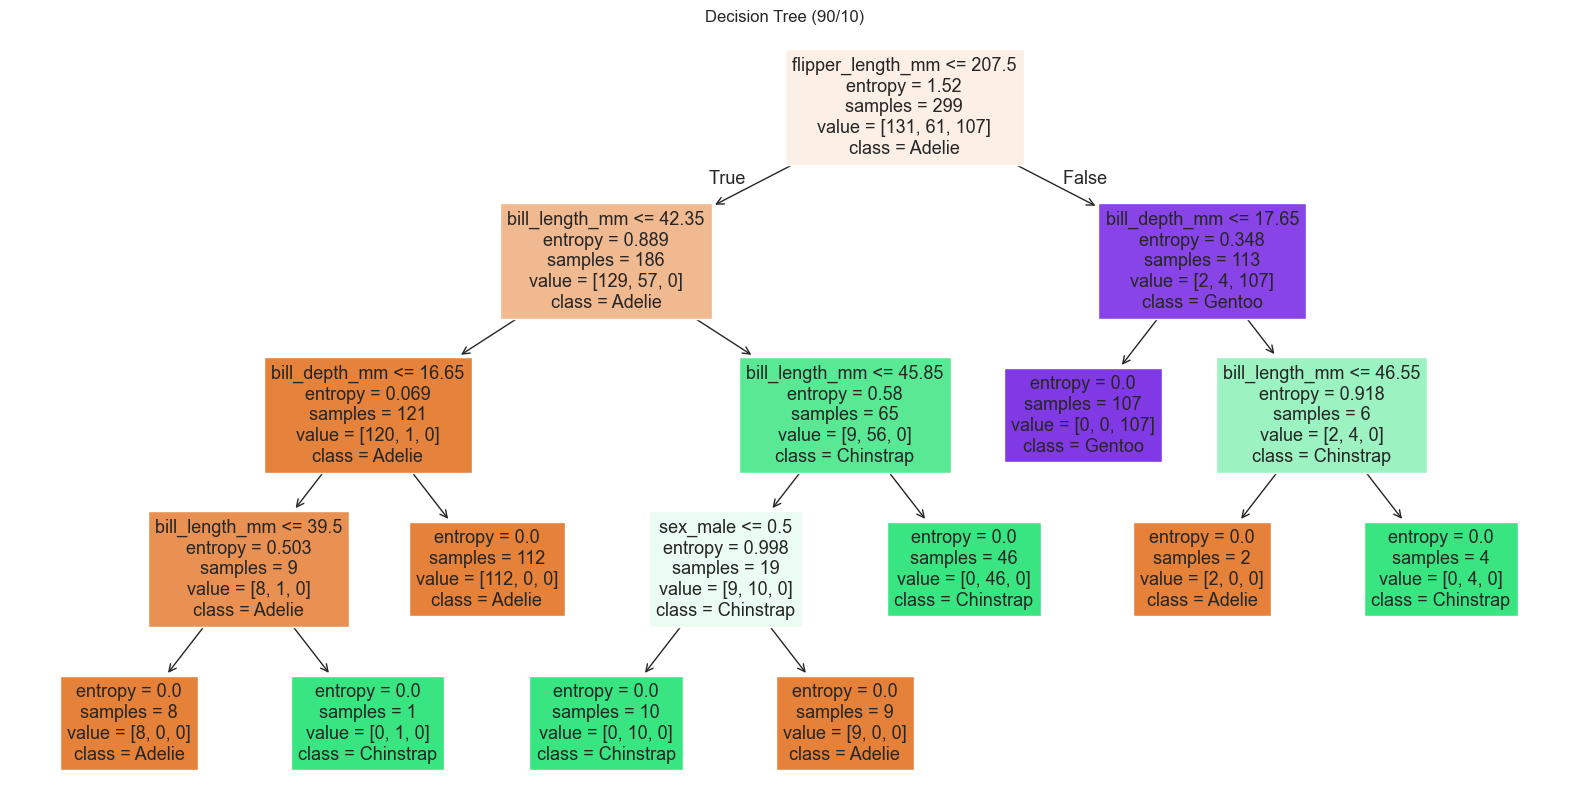

In [18]:
for name, (X_train, X_test, y_train, y_test) in splits.items():
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
    plt.title(f"Decision Tree ({name})")
    plt.show()


### **5) ĐÁNH GIÁ MÔ HÌNH**

=== 40/60 ===
              precision    recall  f1-score   support

      Adelie       0.94      0.93      0.94        88
   Chinstrap       0.86      0.90      0.88        41
      Gentoo       1.00      0.99      0.99        71

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



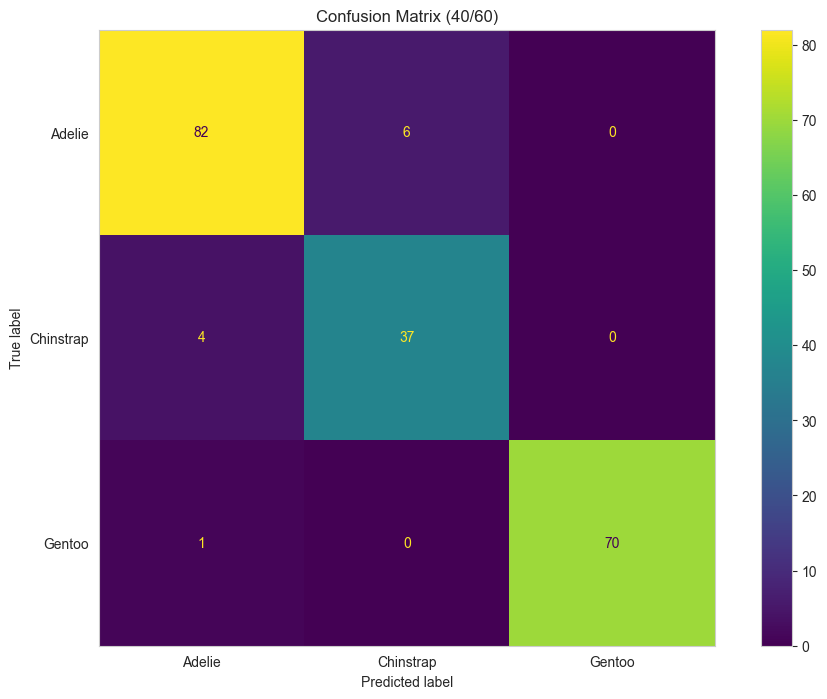

=== 60/40 ===
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        59
   Chinstrap       0.87      1.00      0.93        27
      Gentoo       1.00      0.96      0.98        48

    accuracy                           0.97       134
   macro avg       0.96      0.97      0.96       134
weighted avg       0.97      0.97      0.97       134



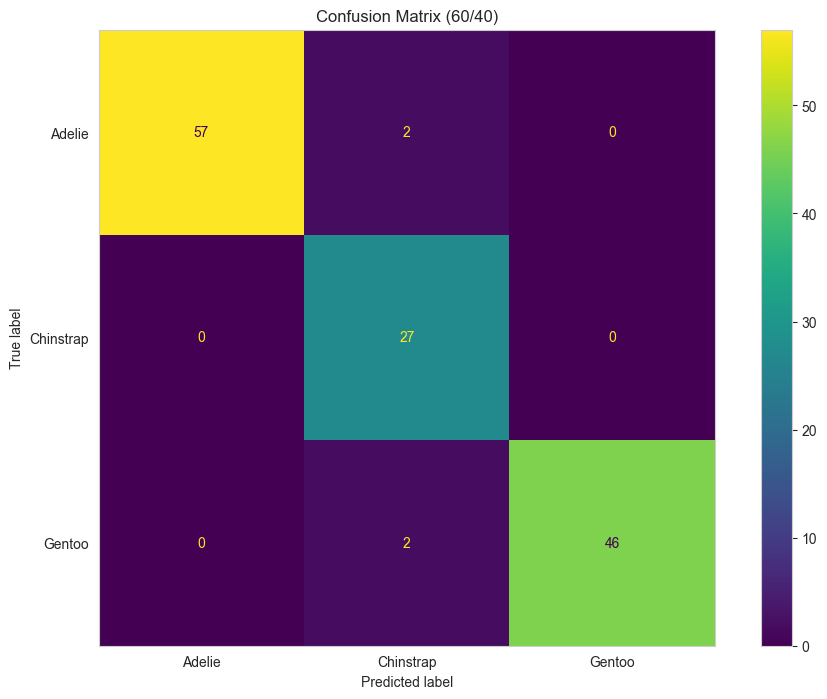

=== 80/20 ===
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.88      1.00      0.93        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.96        67
   macro avg       0.95      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



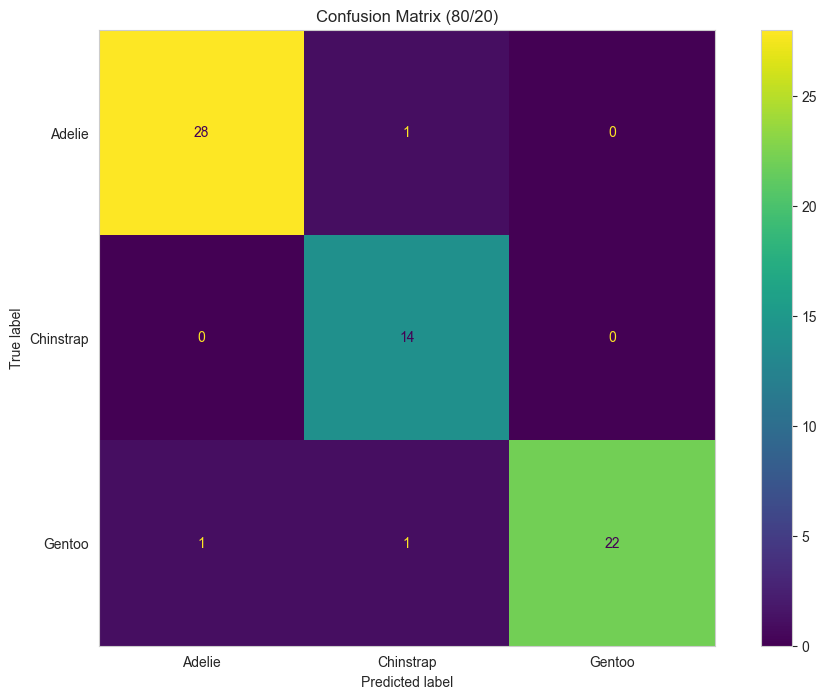

=== 90/10 ===
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        15
   Chinstrap       0.70      1.00      0.82         7
      Gentoo       1.00      0.83      0.91        12

    accuracy                           0.91        34
   macro avg       0.90      0.92      0.90        34
weighted avg       0.94      0.91      0.92        34



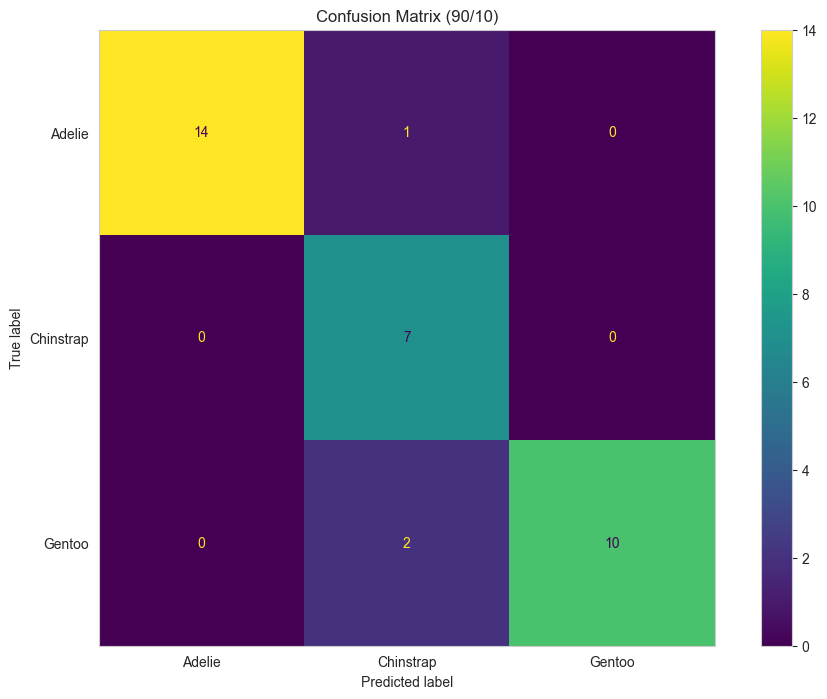

In [21]:
for name, (X_train, X_test, y_train, y_test) in splits.items():
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.grid(False)
    plt.title(f"Confusion Matrix ({name})")
    plt.show()


### **6) PHÂN TÍCH ẢNH HƯỞNG CỦA MAX_DEPTH( TỈ LỆ 80/20)**

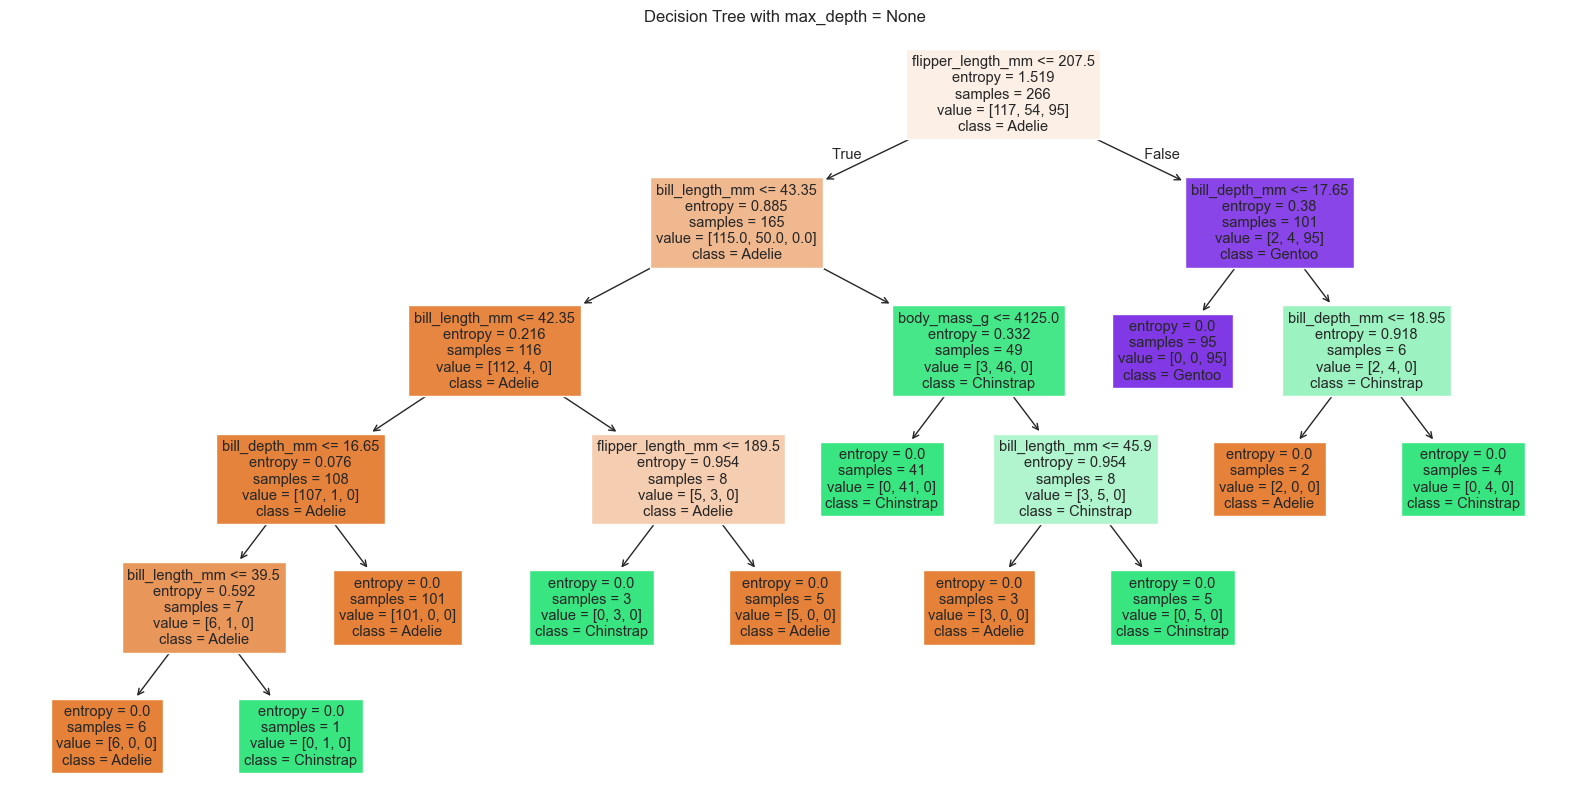

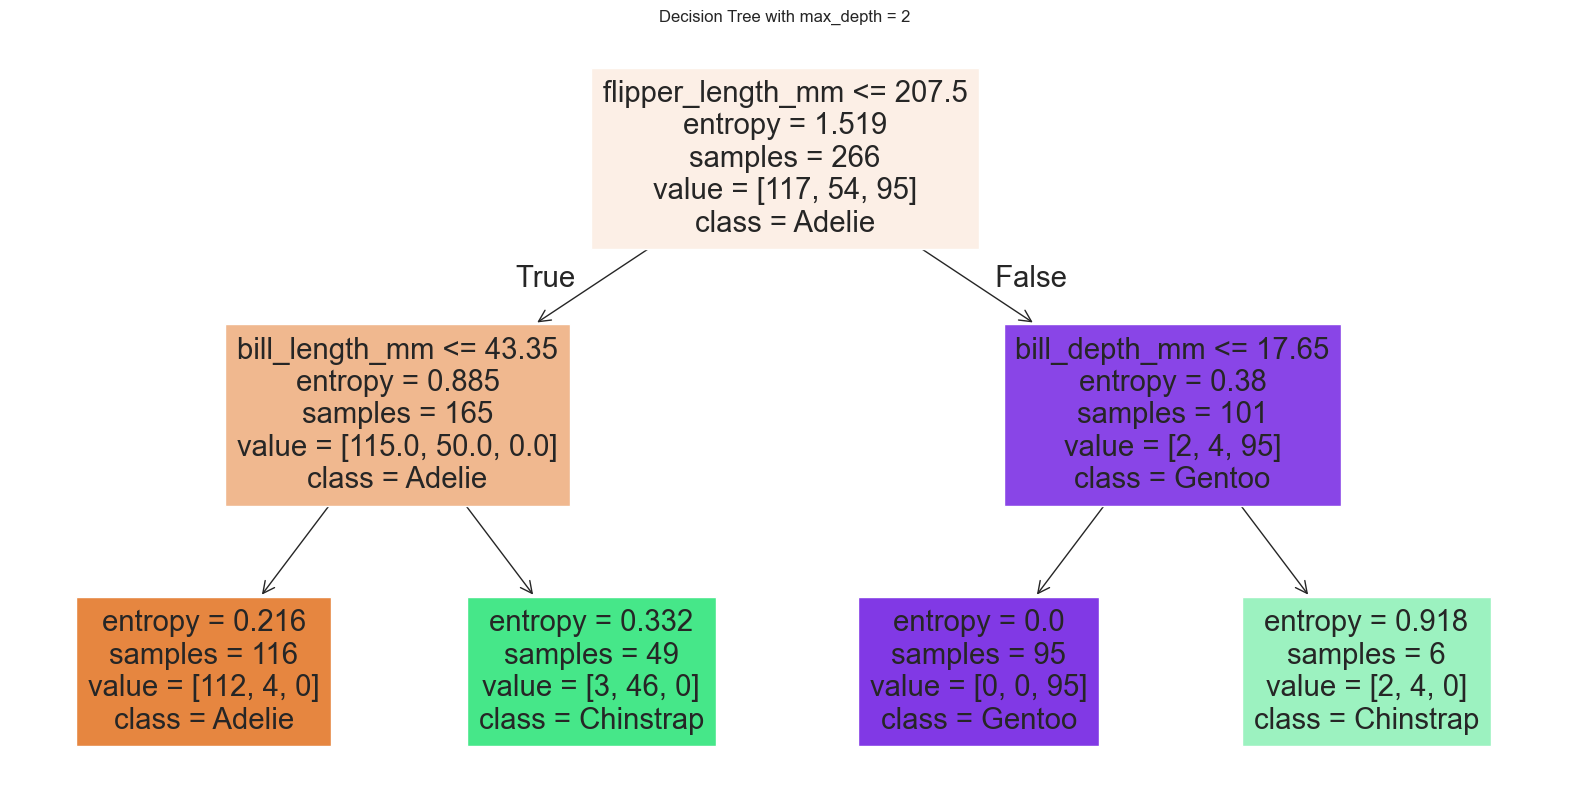

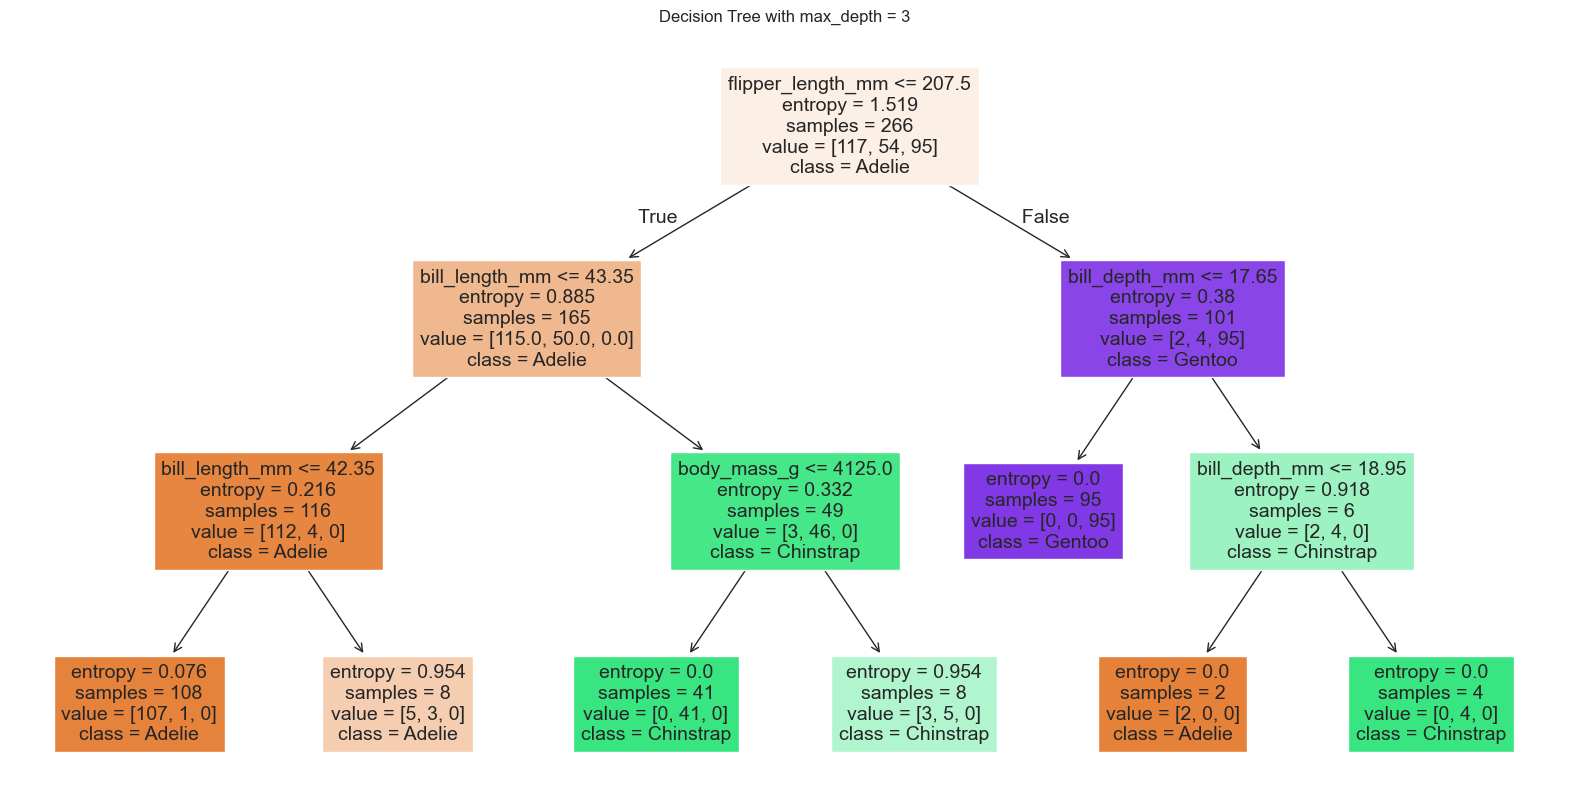

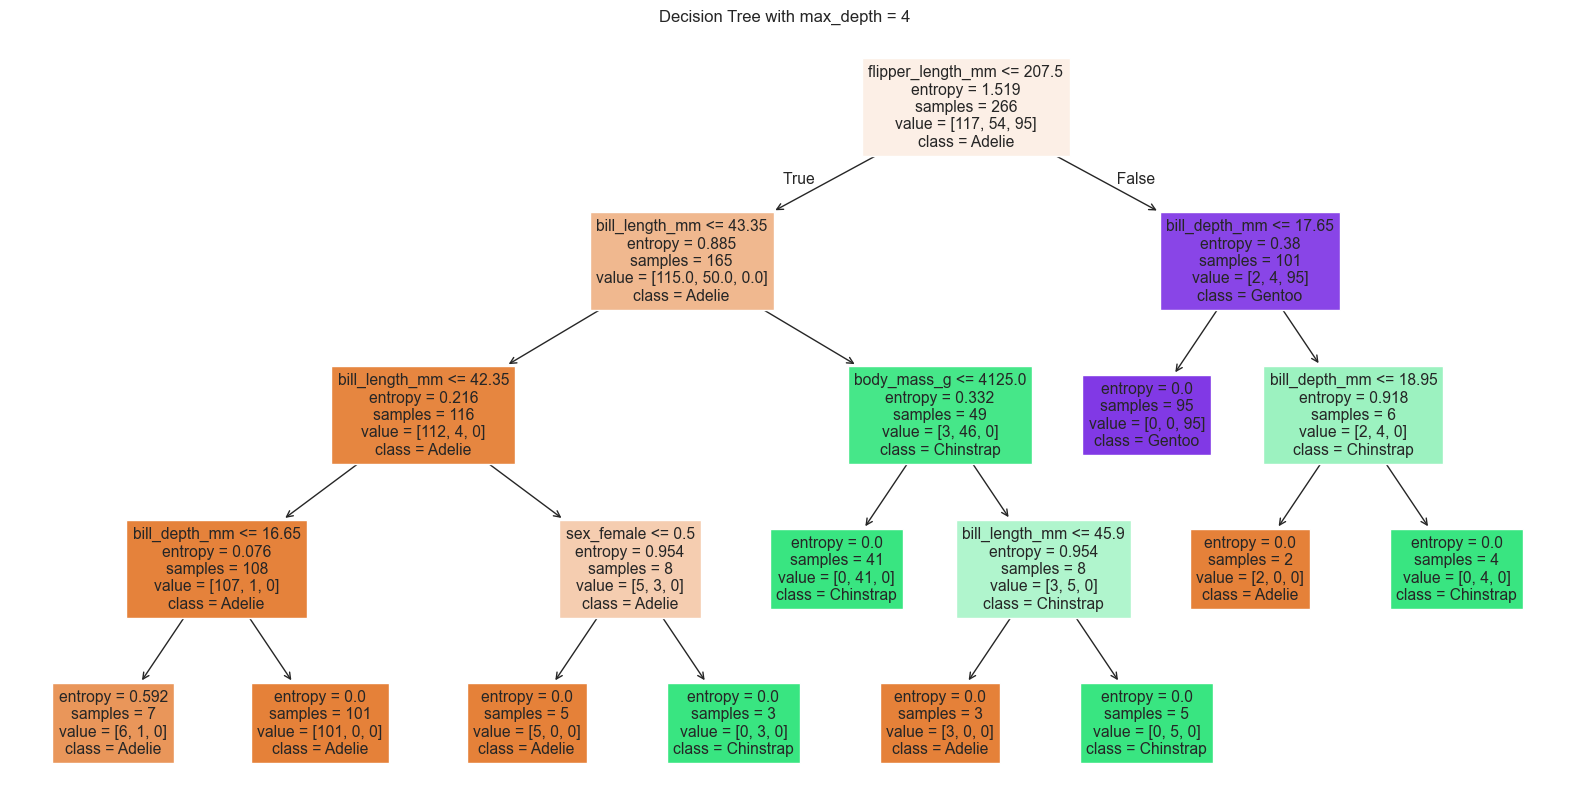

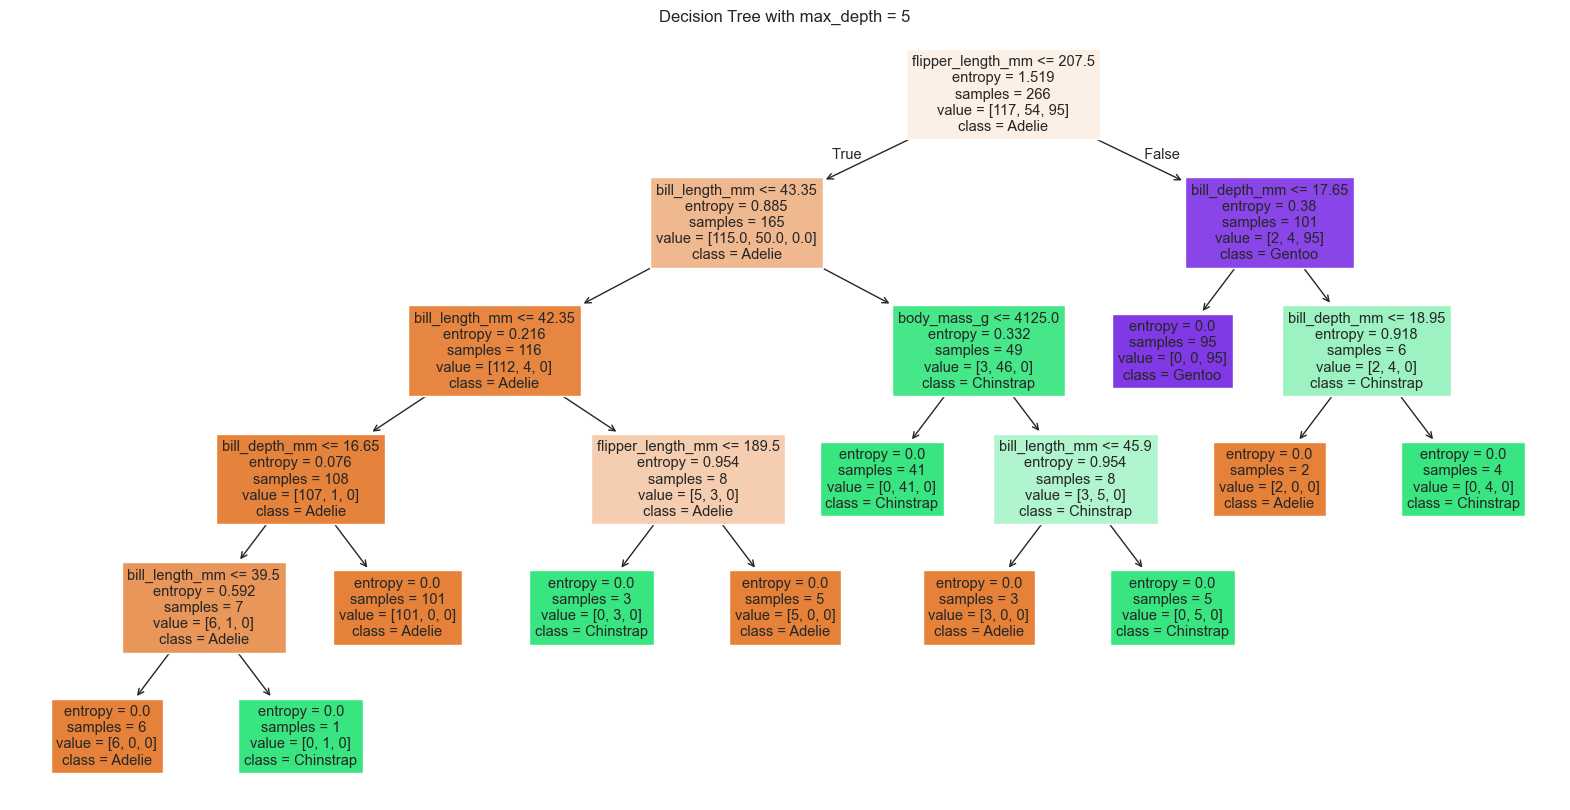

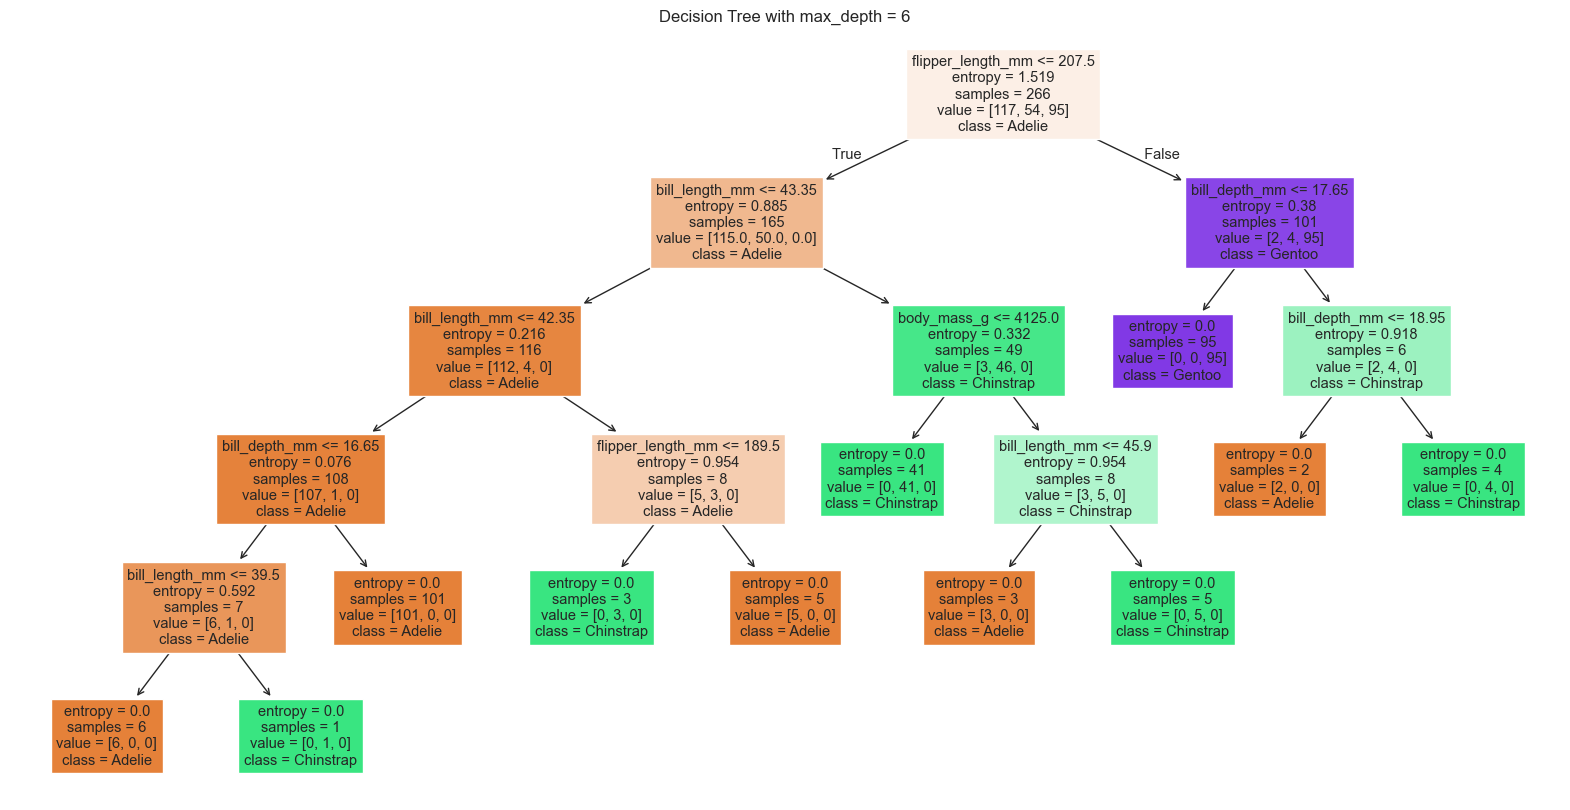

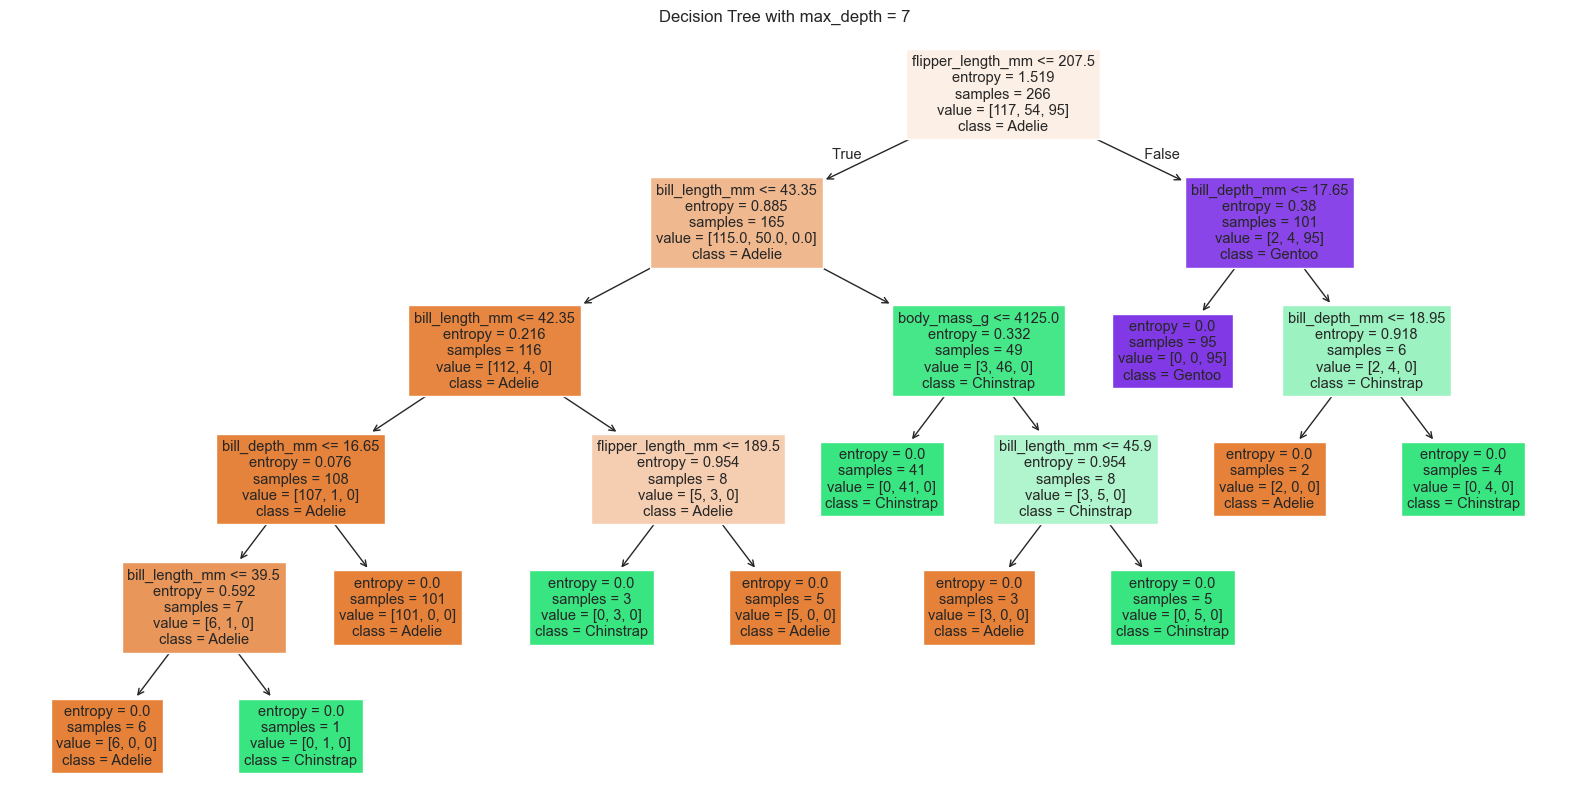


Depth vs Accuracy (80/20 split)
max_depth = None: accuracy = 0.9552
max_depth = 2: accuracy = 0.9403
max_depth = 3: accuracy = 0.9403
max_depth = 4: accuracy = 0.9552
max_depth = 5: accuracy = 0.9552
max_depth = 6: accuracy = 0.9552
max_depth = 7: accuracy = 0.9552


In [10]:
X_train, X_test, y_train, y_test = splits['80/20']
depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
    plt.title(f"Decision Tree with max_depth = {depth}")
    plt.show()
print("\nDepth vs Accuracy (80/20 split)")
for d, acc in zip(depths, accuracies):
    print(f"max_depth = {d}: accuracy = {acc:.4f}")


- #### **Biểu đồ ảnh hưởng của độ sâu cây**

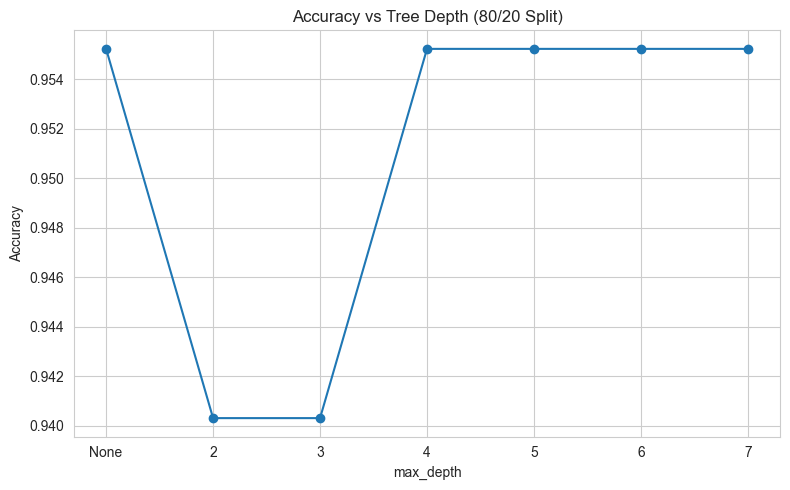


Max Accuracy (80/20 split): 0.9552


In [11]:
plt.figure(figsize=(8, 5))
plt.plot(["None" if d is None else d for d in depths], accuracies, marker='o')
plt.title("Accuracy vs Tree Depth (80/20 Split)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy cao nhất
max_acc = max(accuracies)
print(f"\nMax Accuracy (80/20 split): {max_acc:.4f}")